In [1]:
#Zomato data analysis project
#  --> Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Creating data frame
dataFrame = pd.read_csv("Zomato data .csv")
print(dataFrame)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
#Convert the data type of  column - rate
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataFrame['rate'] = dataFrame['rate'].apply(handleRate)
print(dataFrame.head())
    

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
#Type of restaurant
dataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of restaurant')

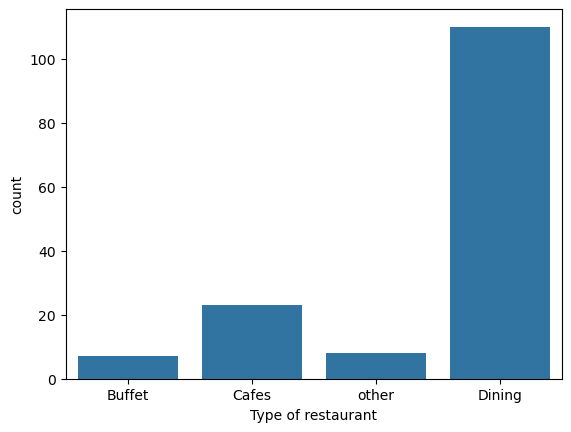

In [14]:
sns.countplot(x=dataFrame['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'votes')

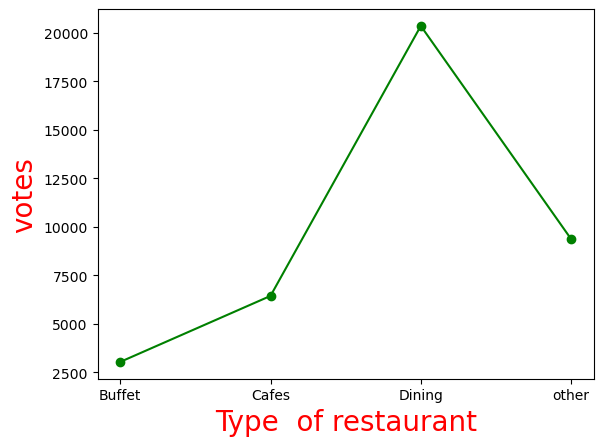

In [24]:
#Hence majority of the retaurants fall in dining category
dataFrame.head()



Text(0, 0.5, 'votes')

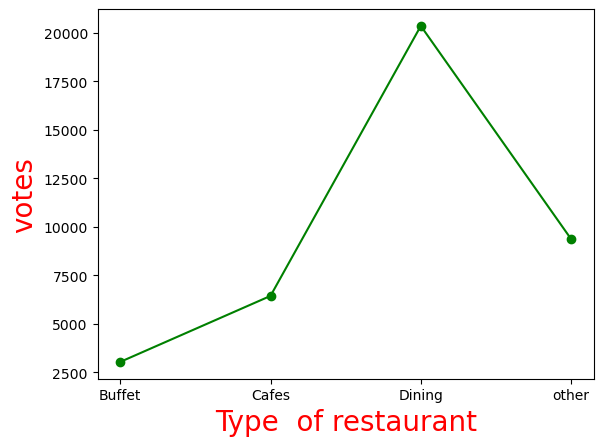

In [26]:
grouped_data = dataFrame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type  of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)

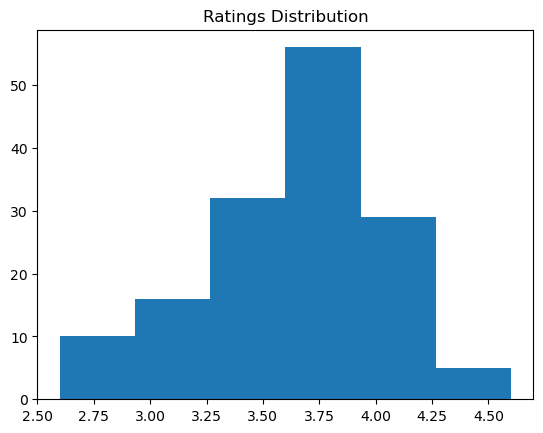

In [32]:
#Conclusion - dining type  has got max. votes

plt.hist(dataFrame['rate'],bins =6)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

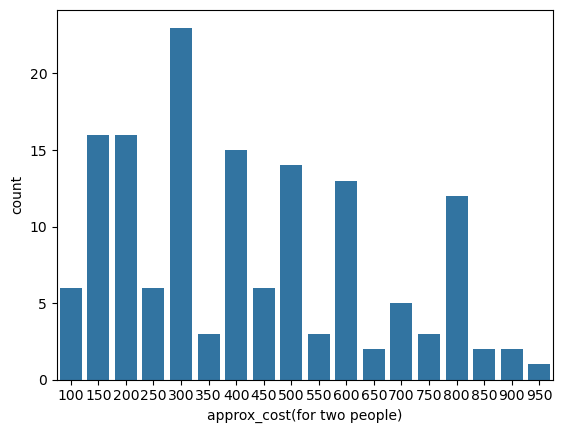

In [34]:
#conclusion - max. ratings  are b/w 3.5-4.0

#Average spending by the couples
couple_data = dataFrame['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

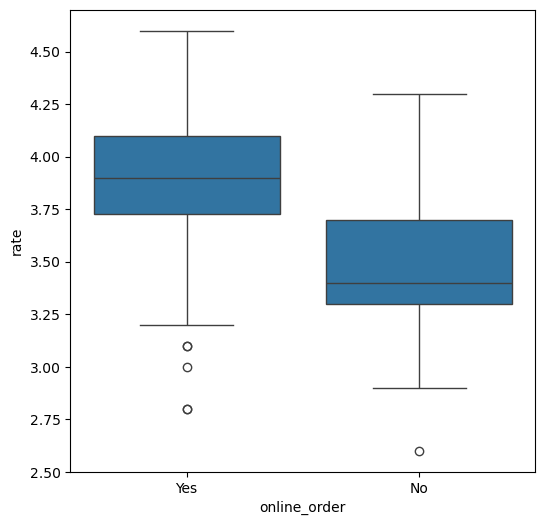

In [36]:
#conclusion - the majority of  couples prefer restaurant with an approximate cost of 300 rupees

#Which mode gets best rating

dataFrame.head()

plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y= 'rate', data = dataFrame)

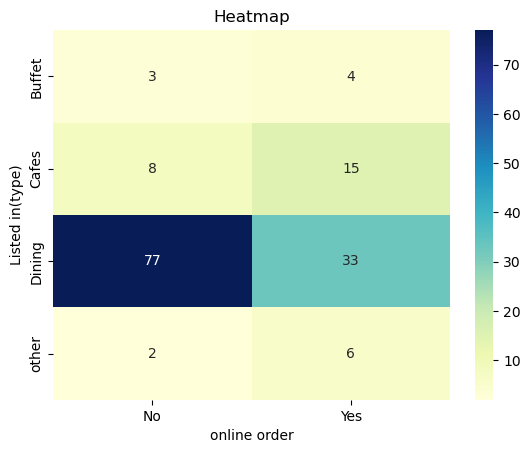

In [42]:
#conclusion - offline orders get  lower ratings than online ones

#Visualisation with heatmap

pivot_table = dataFrame.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("Listed in(type)")
plt.show()
           


In [ ]:
#conclusion - Dining restaurants get more offline orders while people like to order onlline from cafes

